In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv(r"C:\Users\roopa\Desktop\Veer_Trainings\Python, AIML, DS\AIML\insurance.csv")

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
df1=df.copy()

In [8]:
df1['sex']=df1['sex'].astype('category')

In [9]:
df1['sex']=df1['sex'].cat.codes

In [10]:
df1['smoker']=df1['smoker'].astype('category')

In [11]:
df1['smoker']=df1['smoker'].cat.codes

In [12]:
df1['region']=df1['region'].astype('category')

In [13]:
df1['region']=df1['region'].cat.codes

In [14]:
df1

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [15]:
df1.iloc[:,:6].corr()

,age,sex,bmi,children,smoker,region
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000


In [16]:
X=df1.iloc[:,:6]
Y=df1.iloc[:,6]

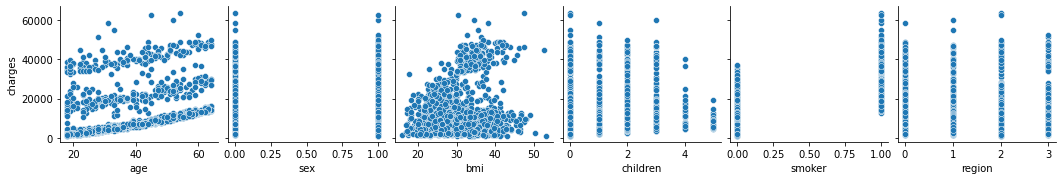

In [17]:
sns.pairplot(df1,x_vars=['age','sex','bmi','children','smoker','region'],y_vars='charges')

In [18]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,random_state=100)

In [19]:
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
Y_pred=lin_reg.predict(X_test)
Y_pred

array([ 4243.31561315,  4369.13065528,  8459.05591009,  2915.20739614,
       24708.66555662, 37368.15092841, 15281.51602126,  3147.62586064,
       29150.85715812, 16274.90312301, 15489.79304716,  4947.64972282,
       11619.8080749 ,  4750.19279286,  9229.87288988, 31369.59601909,
       11824.10389328, 12695.80613448,  6682.24699196, 18394.85460631,
       14274.88310135,  2696.52296793,  6800.89762778, 31818.50562869,
       14042.56735015, 32590.69938853,  7037.9671524 , 39983.52153254,
       31713.41851779, 13528.79721194, 18457.23512674,  2859.41771572,
       39572.78373064, 26732.26324629,  8291.75585794, 12115.926119  ,
        8318.69191239, 32985.84820719,  4486.62717667, 38166.92807174,
        7594.08954766, 13013.78968735,  5455.9709555 ,  8364.73527151,
        1187.59729562,  5302.45656875,  5456.9646098 ,  4076.90595229,
        2672.78104862, 11123.72875998, 17371.8610242 ,  7249.43784082,
        5656.51408129,  8809.43790708,  6911.68645714, 13849.48197757,
      

In [20]:
r2_score(Y_test,Y_pred)

0.7942462599118463

In [21]:
def MAPE(a,b):
    return np.mean(np.abs((a-b)/a))*100

In [22]:
MAPE(Y_test,Y_pred)

34.92601837216962